# Analisis de Datos OPENCAMPUS 2020

In [8]:
import pandas as pd 
import os
import glob
import numpy as np
from IPython.display import display  # Mejor salida en Jupyter

# Ruta de la carpeta con los CSV
carpeta = 'notas-opencampus2020'

# Definir los límites de los rangos
rangos = [0.00, 0.40, 0.50, 0.60, 0.70, 1.01]  # Último valor para incluir 1.00
etiquetas = [
    '0.0 - 0.4',
    '0.4 - 0.5',
    '0.5 - 0.6',
    '0.6 - 0.7'
]

# Lista para almacenar resumen por curso
resumen = []

# Leer todos los archivos CSV de la carpeta
archivos = glob.glob(os.path.join(carpeta, '*.csv'))

for archivo in archivos:
    try:
        df = pd.read_csv(archivo, encoding='utf-8')

        # Verificar si existe la columna 'grade'
        if 'grade' not in df.columns:
            continue

        notas = df['grade']
        notas = notas[(notas >= 0) & (notas <= 1)]  # Asegurar datos válidos

        # Contar por rango definido
        conteo, _ = np.histogram(notas, bins=rangos)

        fila = {
            'Curso': os.path.basename(archivo),
            'Participantes': len(notas)
        }

        # Añadir conteo por rango
        for i, etiqueta in enumerate(etiquetas):
            fila[etiqueta] = conteo[i]

        # Estudiantes aprobados (nota >= 0.70)
        total_aprobados = (notas >= 0.7).sum()
        fila['Total ≥ 0.7'] = total_aprobados

        # Porcentaje de aprobación
        porcentaje_aprobacion = (total_aprobados / len(notas)) * 100 if len(notas) > 0 else 0
        fila['Porcentaje Aprobación (%)'] = round(porcentaje_aprobacion, 2)

        resumen.append(fila)

    except Exception as e:
        print(f"⚠ Error en {archivo}: {e}")

# Crear DataFrame
df_resumen = pd.DataFrame(resumen)

# Ordenar columnas
columnas_ordenadas = ['Curso', 'Participantes'] + etiquetas + ['Total ≥ 0.7', 'Porcentaje Aprobación (%)']
df_resumen = df_resumen[columnas_ordenadas]

# Agregar fila de totales generales
totales = df_resumen[etiquetas + ['Participantes', 'Total ≥ 0.7']].sum(numeric_only=True)
totales['Curso'] = 'ΣUMA'
totales['Porcentaje Aprobación (%)'] = round((totales['Total ≥ 0.7'] / totales['Participantes']) * 100, 2)
df_resumen = pd.concat([df_resumen, pd.DataFrame([totales])], ignore_index=True)

# Mostrar con display
display(df_resumen)


,Curso,Participantes,0.0 - 0.4,0.4 - 0.5,0.5 - 0.6,0.6 - 0.7,Total ≥ 0.7,Porcentaje Aprobación (%)
0,UTPL_AKOMP14_2020_2_grade_report_2020-12-29-18...,1918,1434,50,73,56,305,15.90
1,UTPL_ANTRPY7_2020_2_grade_report_2020-12-29-18...,832,596,31,45,36,124,14.90
2,UTPL_AUDIOVPRO8_2020_2_grade_report_2020-12-29...,1881,1458,42,53,41,287,15.26
3,UTPL_CD14_2020_2_grade_report_2020-12-29-1706.csv,1698,1276,27,52,15,328,19.32
4,UTPL_COMPFUND4_2020_2_grade_report_2020-12-29-...,2626,1903,124,147,44,408,15.54
5,UTPL_EAAM7_2020_2_grade_report_2020-12-29-1718...,1150,899,23,22,44,162,14.09
6,UTPL_EAIG7_2020_2_grade_report_2020-12-29-1720...,3055,2915,26,18,17,79,2.59
7,UTPL_EAUF7_2020_2_grade_report_2020-12-29-1724...,1188,798,33,3,17,337,28.37
8,UTPL_EFHE14_2020_2_grade_report_2020-12-29-172...,2812,2073,81,97,38,523,18.60
9,UTPL_ETHIC4_2020_2_grade_report_2020-12-29-173...,1568,1209,23,23,37,276,17.60


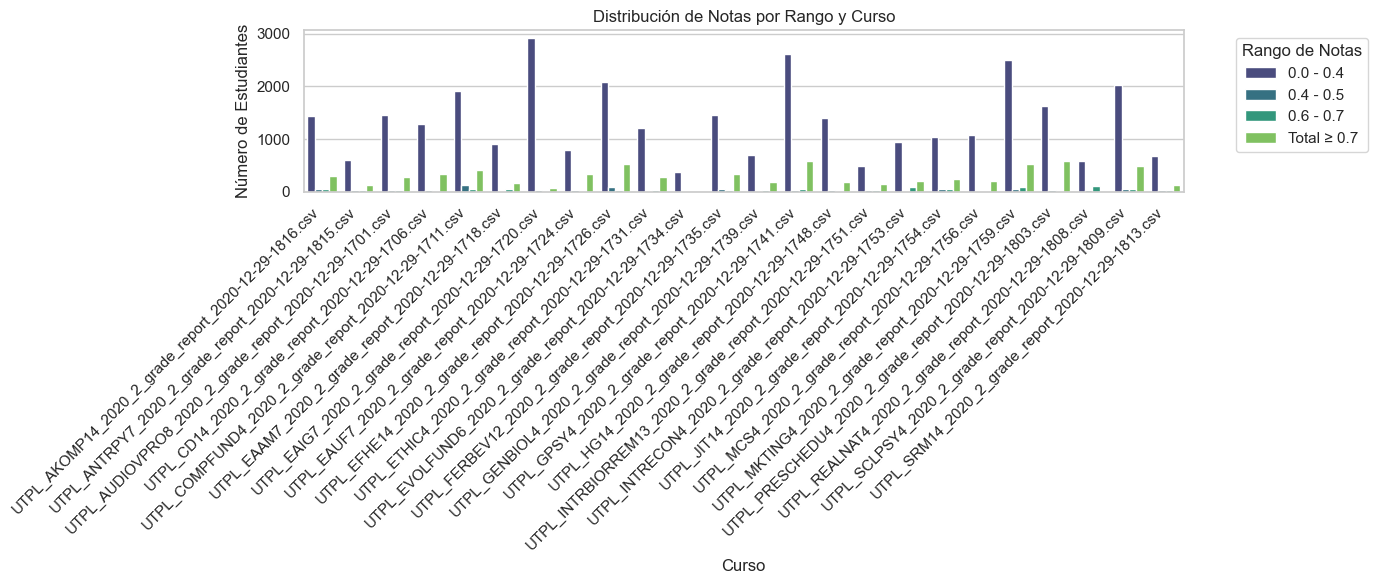

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración para estilo visual
sns.set(style="whitegrid")

# Eliminar la fila total para los gráficos
df_graficos = df_resumen[df_resumen['Curso'] != 'ΣUMA']

# Definir columnas de los rangos
columnas_rangos = [
    '0.0 - 0.4',
    '0.4 - 0.5',
    '0.6 - 0.7',
    '0.6 - 0.7',
    'Total ≥ 0.7'
]

# Gráfico de barras agrupado por curso
df_melt = df_graficos.melt(id_vars='Curso', value_vars=columnas_rangos,
                           var_name='Rango', value_name='Cantidad')

plt.figure(figsize=(14, 6))
sns.barplot(data=df_melt, x='Curso', y='Cantidad', hue='Rango', palette='viridis')

plt.title('Distribución de Notas por Rango y Curso')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Número de Estudiantes')
plt.xlabel('Curso')
plt.legend(title='Rango de Notas', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

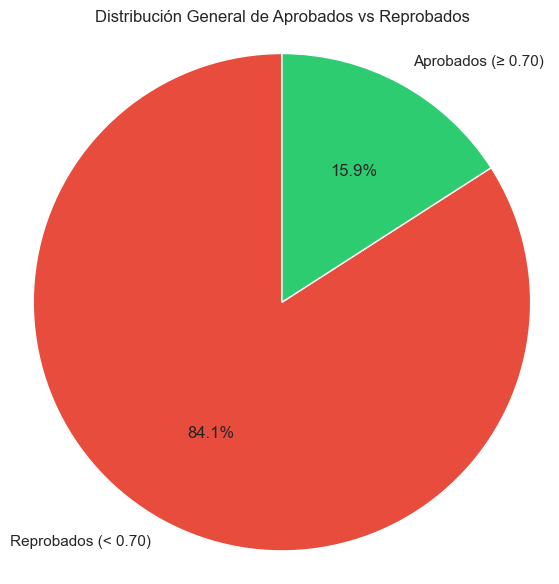

In [13]:
# Calcular total de participantes y total de aprobados
total_participantes = df_graficos['Participantes'].sum()
total_aprobados = df_graficos['Total ≥ 0.7'].sum()
total_reprobados = total_participantes - total_aprobados

# Datos para el gráfico
valores = [total_reprobados, total_aprobados]
etiquetas = ['Reprobados (< 0.70)', 'Aprobados (≥ 0.70)']
colores = ['#e74c3c', '#2ecc71']

# Crear gráfico de pastel
plt.figure(figsize=(6, 6))
plt.pie(valores, labels=etiquetas, autopct='%1.1f%%', colors=colores, startangle=90)
plt.title('Distribución General de Aprobados vs Reprobados')
plt.axis('equal')  # Asegura que el círculo sea redondo
plt.tight_layout()
plt.show()